# Data Exploration

In [1]:
%reload_ext autoreload
%autoreload 2

In [42]:
# Get all the necessary imports
from fastai.vision.all import *
import wandb, PIL
plt.style.use("fivethirtyeight")
import seaborn as sns

In [3]:
# Initialize a wandb project and name it appropriately
# Start a new project in wandb
wandb.init(project = "oxford_flowers_classification")
wandb.run.name = "DataExploration"

wandb: Currently logged in as: vinayak_nayak. Use `wandb login --relogin` to force relogin


In [12]:
# Download the flowers dataset
path = untar_data(URLs.FLOWERS)

# Move the images to current project directory's data folder
os.system(f"mv {pth} ../data")

# Log the dataset to wandb
artifact = wandb.Artifact('flowers_dataset', type='dataset')
artifact.add_dir("../data/oxford-102-flowers/")
wandb.run.log_artifact(artifact)

wandb: Adding directory to artifact (./../data/oxford-102-flowers)... Done. 1.9s


In [16]:
# Parse the dataset to get the input, target values
def parse_lines(pth: str):
    data = Path(pth).read_text().split("\n")
    datapoints = [x.split(" ") for x in data if x != ""]
    x = [tmp[0] for tmp in datapoints]
    y = [tmp[1] for tmp in datapoints]
    return x, y

# Get the train, valid and test input/output pairs
train_x, train_y = parse_lines("../data/oxford-102-flowers/train.txt")
valid_x, valid_y = parse_lines("../data/oxford-102-flowers/valid.txt")
test_x, test_y = parse_lines("../data/oxford-102-flowers/test.txt")

# Create a dataframe for ip/op pairs and the type of datapoint
x = train_x + valid_x + test_x
y = train_y + valid_y + test_y
labels = ["train"] * len(train_x) + ["valid"] * len(valid_x) + ["test"] * len(test_x)
df = pd.DataFrame([x, y, labels], index = ["ImgPath", "ImgLabel", "SetType"]).T
df.to_csv("../data/data.csv", index = None)

# Log the dataframe as a table
table = wandb.Table(dataframe = df)
wandb.run.log({"Datatable": table})

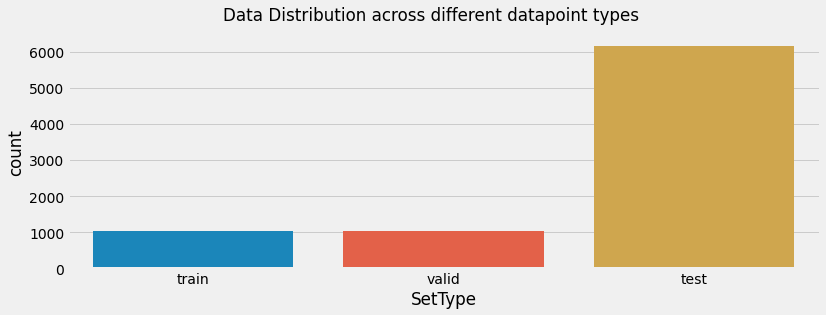

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
sns.countplot(x = df.SetType);
fig.suptitle("Data Distribution across different datapoint types")
wandb.log({"Data Distribution": wandb.Image(fig)})

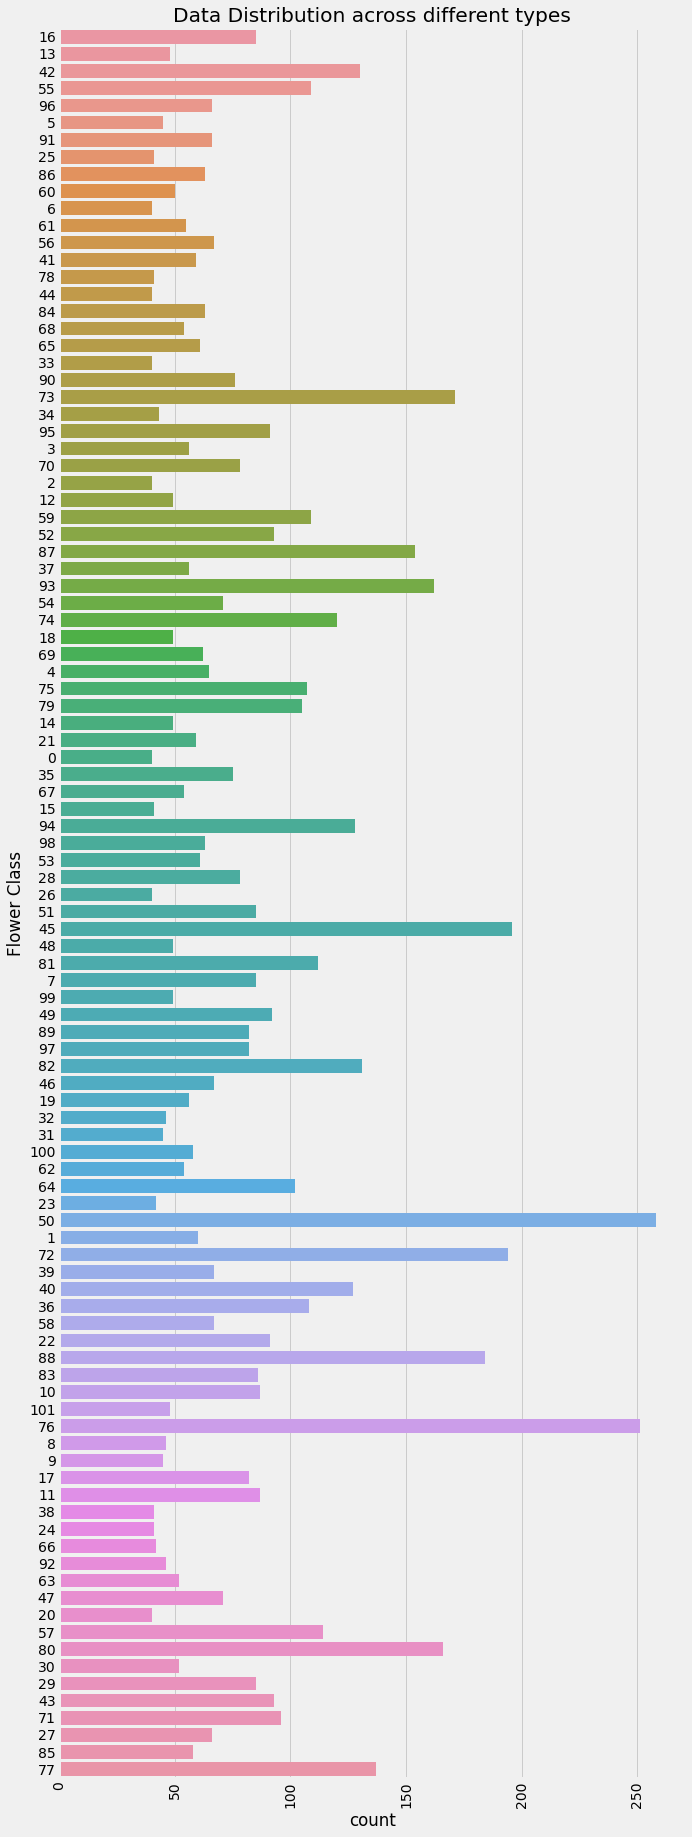

In [30]:
# Have a look at the label distribution
fig, ax = plt.subplots(1, 1, figsize = (10, 30))
sns.countplot(y = df.ImgLabel, orient='h', ax = ax); plt.xticks(rotation = 90);
plt.title("Data Distribution across different types"); plt.ylabel("Flower Class");
wandb.log({"Data Distribution across Flower classes": wandb.Image(fig)});

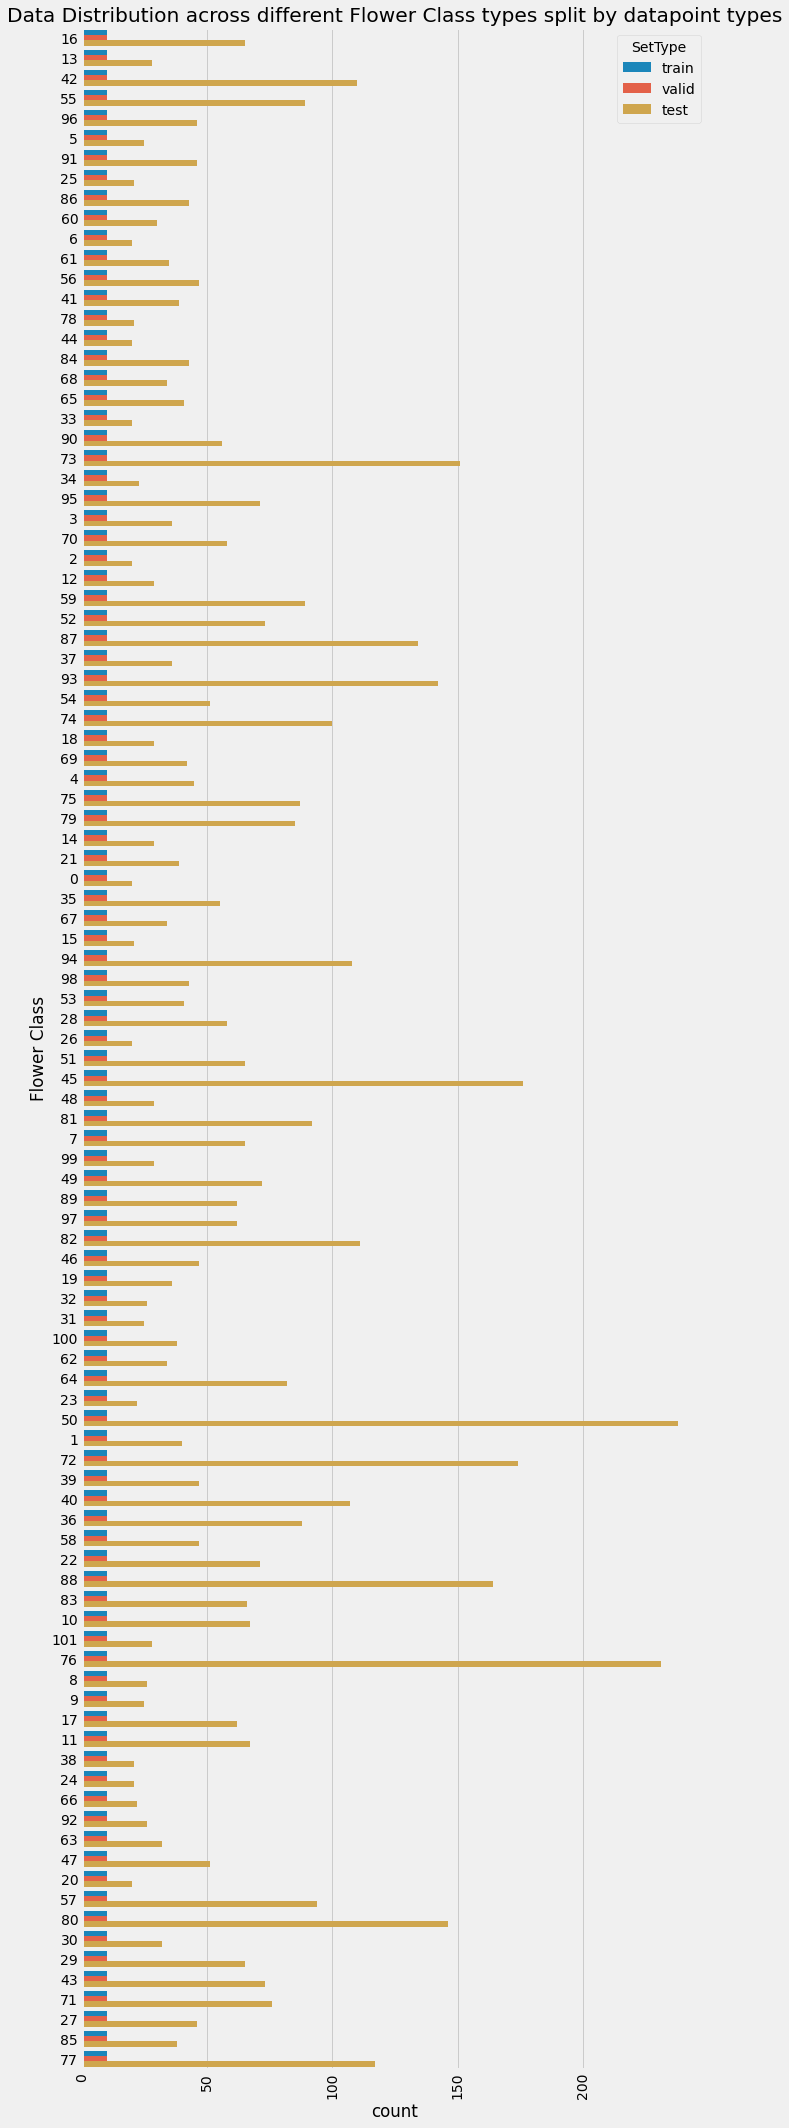

In [35]:
# Have a look at the label distribution grouped by set type
fig, ax = plt.subplots(1, 1, figsize = (10, 35))
sns.countplot(y = df.ImgLabel, hue = df.SetType); plt.xticks(rotation = 90);
plt.title("Data Distribution across different Flower Class types split by datapoint types"); plt.ylabel("Flower Class");
wandb.log({"Data Distribution across Flower classes split by datapoint types": wandb.Image(fig)});

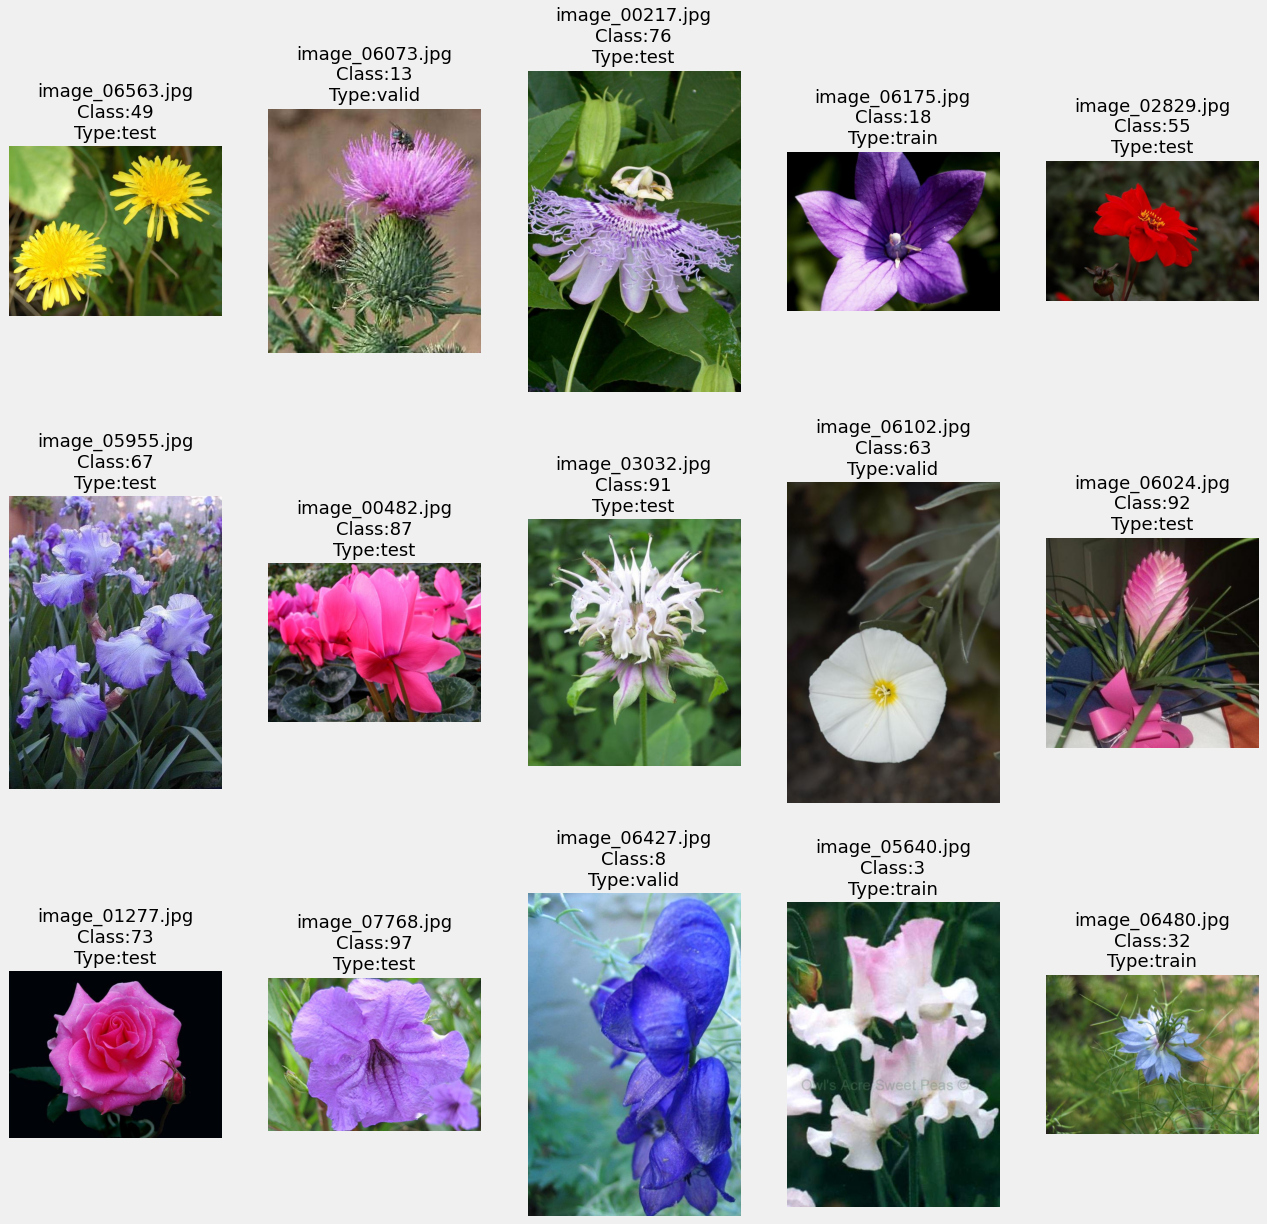

In [49]:
fig, ax = plt.subplots(3, 5, figsize = (20,20))
ax = ax.flatten()

for axis, sample in zip(ax, df.sample(n = 15).itertuples()):
    _, pth, lbl, typ = sample
    axis.imshow(PIL.Image.open(f"../data/oxford-102-flowers/{pth}"))
    axis.set_xticks([]); axis.set_yticks([]);
    axis.set_title(f"{Path(pth).name}\nClass:{lbl}\nType:{typ}", fontsize = 18)
wandb.log({"Random Dataset Cross-Section": wandb.Image(fig)});